In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
def equation_to_fit(x, Vmax, Kd):
    return (Vmax * x) / (Kd + x)

In [3]:
x_data = np.linspace(0, 100, 8)
y_truedata = equation_to_fit(x_data, 100, 10)

'''Create some noise and add it to the y values to represent experimental data'''
y_noise = 0.5 * np.random.normal(size = x_data.size)
y_experimental = y_truedata + y_noise

In [4]:
MyData = pd.DataFrame({'x':x_data, 'y':y_experimental})
MyData

,x,y
0,0.000000,1.396347
1,14.285714,59.306593
2,28.571429,73.509991
3,42.857143,81.493911
4,57.142857,85.222315
5,71.428571,87.225563
6,85.714286,89.369477
7,100.000000,91.323568


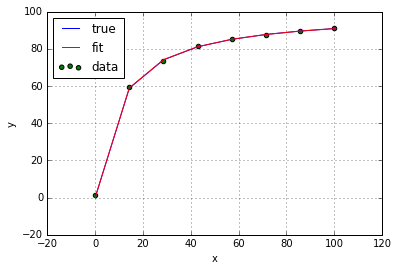

[ 99.84181422   9.89374262]
[ 0.70840366  0.37922939]


In [5]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [1,1]
low_bounds = [0,0]
up_bounds = [1000, 1000]
fit_params, covar_params = curve_fit(equation_to_fit, MyData.x, MyData.y, p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))

plt.plot(MyData.x, y_truedata, c='b', label='true')
plt.scatter(MyData.x, MyData.y, c='g', label='data')
plt.plot(MyData.x, equation_to_fit(x_data, *fit_params), c='r', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.grid()
plt.show()
print(fit_params)
print(std_dev_error_of_fit_params)